## Business problem

#### Stakeholder: NASA

- Want a prediction of whether a star is variable that can be used in absence of a true classification.

#### True business problem:  

- Predict whether a star is variable or not using other information about the star.

#### Deliverables: Inference or Prediction?

- Prediction
    - If a star isn't classified as variable or not, then our prediction can be used in absence of a true classification

#### Context:

- **False negative** Predicts star is not variable, star is variable
    - **Outcome**: A variable star is overlooked.
- **False positive** Predicts star is variable, star is not variable
    - **Outcome**: Resources are put into looking at a star which is not variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, plot_confusion_matrix, confusion_matrix, plot_roc_curve, precision_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

pd.set_option('display.max_columns', None)

In [2]:
pd.read_csv("../../data/hipparcos-voidmain.csv")

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,Plx,pmRA,pmDE,e_RAdeg,e_DEdeg,e_Plx,e_pmRA,e_pmDE,DE:RA,Plx:RA,Plx:DE,pmRA:RA,pmRA:DE,pmRA:Plx,pmDE:RA,pmDE:DE,pmDE:Plx,pmDE:pmRA,F1,F2,---,BTmag,e_BTmag,VTmag,e_VTmag,m_BTmag,B-V,e_B-V,r_B-V,V-I,e_V-I,r_V-I,CombMag,Hpmag,e_Hpmag,Hpscat,o_Hpmag,m_Hpmag,Hpmax,HPmin,Period,HvarType,moreVar,morePhoto,CCDM,n_CCDM,Nsys,Ncomp,MultFlag,Source,Qual,m_HIP,theta,rho,e_rho,dHp,e_dHp,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,NaN,3.54,-5.20,-1.88,1.32,0.74,1.39,1.36,0.81,0.32,-0.07,-0.11,-0.24,0.09,-0.01,0.10,-0.01,0.01,0.34,0.0,0.74,1,9.643,0.020,9.130,0.019,NaN,0.482,0.025,T,0.55,0.03,L,NaN,9.2043,0.0020,0.017,87.0,NaN,9.17,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,+,21.90,181.21,-0.93,1.28,0.70,3.10,1.74,0.92,0.12,-0.14,-0.24,-0.29,0.01,0.21,-0.02,-0.19,-0.28,0.14,2.0,1.45,2,10.519,0.033,9.378,0.021,NaN,0.999,0.002,G,1.04,0.00,I,NaN,9.4017,0.0017,0.015,120.0,NaN,9.37,9.44,NaN,C,NaN,NaN,NaN,NaN,NaN,1.0,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,NaN,2.81,5.24,-2.91,0.53,0.40,0.63,0.57,0.47,0.06,0.09,0.04,0.43,-0.01,-0.06,0.03,0.24,0.07,0.21,0.0,-0.45,3,6.576,0.004,6.621,0.005,NaN,-0.019,0.004,G,0.00,0.00,H,NaN,6.6081,0.0007,0.008,127.0,NaN,6.60,6.62,NaN,C,NaN,NaN,00000+3852,I,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,NaN,7.75,62.85,0.16,0.53,0.59,0.97,0.65,0.65,-0.22,-0.09,-0.03,0.24,0.20,0.08,0.18,0.08,-0.31,-0.18,0.0,-1.46,4,8.471,0.007,8.092,0.007,NaN,0.370,0.009,T,0.43,0.01,L,NaN,8.1498,0.0011,0.015,201.0,NaN,8.12,8.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,NaN,2.87,2.53,9.07,0.64,0.61,1.11,0.67,0.74,0.10,0.24,0.06,0.26,-0.10,0.20,-0.16,-0.30,-0.19,0.06,0.0,-1.24,5,9.693,0.014,8.656,0.010,NaN,0.902,0.013,T,0.90,0.01,L,NaN,8.7077,0.0018,0.019,161.0,NaN,8.68,8.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118213,H,118318,NaN,23 59 51.30,+11 40 25.4,6.99,1.0,H,359.963744,11.673709,NaN,1.92,-2.16,2.09,0.78,0.50,0.91,0.88,0.60,0.33,-0.02,-0.09,-0.19,-0.03,0.21,-0.02,-0.11,0.27,0.49,0.0,2.00,118318,9.107,0.015,7.186,0.007,NaN,1.595,0.013,T,1.61,0.01,L,NaN,7.1043,0.0018,0.014,92.0,NaN,7.08,7.12,NaN,M,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224673.0,B+10 5018,NaN,NaN,1.56,K2,S
118214,H,118319,NaN,23 59 53.74,-22 25 41.4,8.23,NaN,G,359.973913,-22.428180,NaN,10.63,148.74,27.53,0.97,0.58,1.17,1.10,0.52,0.04,0.17,0.04,-0.11,0.10,0.17,0.07,-0.31,0.12,-0.05,0.0,1.19,118319,9.019,0.013,8.295,0.011,NaN,0.639,0.015,G,0.70,0.01,H,NaN,8.3699,0.0014,0.016,118.0,NaN,8.34,8.39,NaN,C,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224693.0,NaN,C-23 18108,P-23 8366,0.70,G2V,4
118215,H,118320,NaN,23 59 54.25,+05 57 23.9,7.59,NaN,H,359.976057,5.956638,NaN,5.00,20.92,-35.26,0.95,0.53,1.01,0.89,0.54,0.21,0.00,-0.05,-0.18,0.01,-0.04,0.01,-0.14,0.22,0.27,4.0,-1.12,118320,8.868,0.013,7.704,0.009,NaN,0.999,0.012,T,0.98,0.01,L,NaN,7.7604,0.0010,0.010,86.0,NaN,7.74,7.77,NaN,C,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224689.0,B+05 5245,NaN,NaN,0.98,K0,S


In [149]:
df = pd.read_csv("../../data/UsableData.csv")
holdoutdf = pd.read_csv("../../data/UntestableData.csv")
df = df.drop(columns=['Unnamed: 0'])
df['HvarType'] = df['HvarType'].mask(df['HvarType'] != 'C', other='V')

df = df.drop(columns=['Catalog', 'VarFlag', '---', 'Period', 'moreVar', 'morePhoto', 'Source'])
holdoutdf = holdoutdf.drop(columns=['Unnamed: 0', 'Catalog', 'VarFlag', '---', 'Period', 'moreVar', 'morePhoto', 'Source'])

mask = {
    'C': 0,
    'V': 1
}
df['Target'] = df['HvarType'].map(mask)
df['AstroRefIndicator'] = df['AstroRef'].isna()
mask = {
    True: 1,
    False: 0
}
df['AstroRefIndicator'] = df['AstroRefIndicator'].map(mask)

x = df.drop(columns=['HvarType','Target','HIP'])
y = df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

In [150]:
def displayMetrics(fitModel, xtr, xte, ytr, yte):
    train_preds = fitModel.predict(xtr)
    test_preds = fitModel.predict(xte)
    train_probs = fitModel.predict_proba(xtr)[:,1]
    test_probs = fitModel.predict_proba(xte)[:,1]

    train_accuracy = accuracy_score(ytr, train_preds)
    test_accuracy = accuracy_score(yte, test_preds)
    train_recall = recall_score(ytr, train_preds, zero_division=0)
    test_recall = recall_score(yte, test_preds, zero_division=0)
    train_precision = precision_score(ytr, train_preds, zero_division=0)
    test_precision = precision_score(yte, test_preds, zero_division=0)
    train_f1 = f1_score(ytr, train_preds, zero_division=0)
    test_f1 = f1_score(yte, test_preds, zero_division=0)
    train_rocauc = roc_auc_score(ytr, train_probs)
    test_rocauc = roc_auc_score(yte, test_probs)

    print(F'\nTrain Accuracy:\t\t{train_accuracy}')
    print(F'Test Accuracy:\t\t{test_accuracy}')
    print(F"\nTrain Recall:\t\t{train_recall}")
    print(F'Test Recall:\t\t{test_recall}')
    print(F"\nTrain Precision:\t{train_precision}")
    print(F'Test Precision:\t\t{test_precision}')
    print(F"\nTrain f1:\t\t{train_f1}")
    print(F'Test f1:\t\t{test_f1}')
    print(F"\nTrain ROC-AUC:\t\t{train_rocauc}")
    print(F'Test ROC-AUC:\t\t{test_rocauc}')
    
    plot_confusion_matrix(fitModel, xte, yte)

In [151]:
# pd.set_option('display.max_rows', None)

In [152]:
# for col in holdoutdf.columns:
#     print(f"df {col} nulls: {df[col].isna().sum()}, {round((df[col].isna().sum() / len(df)), 4)}")
#     print(f"Holdoutdf {col} nulls: {holdoutdf[col].isna().sum()}, {round((holdoutdf[col].isna().sum() / len(holdoutdf)), 4)}")
#     print(f"Difference: {df[col].isna().sum() - holdoutdf[col].isna().sum()}\n")

In [153]:
y_train.value_counts(normalize=True)

0    0.650421
1    0.349579
Name: Target, dtype: float64

Guessing not variable every time would be correct 65% of the time.

In [154]:
numCols = [col for col in x_train.columns if x_train[col].dtype != 'O']
numCols

['Vmag',
 'RAdeg',
 'DEdeg',
 'Plx',
 'pmRA',
 'pmDE',
 'e_RAdeg',
 'e_DEdeg',
 'e_Plx',
 'e_pmRA',
 'e_pmDE',
 'DE:RA',
 'Plx:RA',
 'Plx:DE',
 'pmRA:RA',
 'pmRA:DE',
 'pmRA:Plx',
 'pmDE:RA',
 'pmDE:DE',
 'pmDE:Plx',
 'pmDE:pmRA',
 'F1',
 'F2',
 'BTmag',
 'e_BTmag',
 'VTmag',
 'e_VTmag',
 'B-V',
 'e_B-V',
 'V-I',
 'e_V-I',
 'Hpmag',
 'e_Hpmag',
 'Hpscat',
 'o_Hpmag',
 'Hpmax',
 'HPmin',
 'Nsys',
 'Ncomp',
 'theta',
 'rho',
 'e_rho',
 'dHp',
 'e_dHp',
 'HD',
 '(V-I)red',
 'AstroRefIndicator']

In [155]:
objCols = [col for col in x_train.columns if x_train[col].dtype == 'O']
objCols

['Proxy',
 'RAhms',
 'DEdms',
 'r_Vmag',
 'AstroRef',
 'm_BTmag',
 'r_B-V',
 'r_V-I',
 'CombMag',
 'm_Hpmag',
 'CCDM',
 'n_CCDM',
 'MultFlag',
 'Qual',
 'm_HIP',
 'Survey',
 'Chart',
 'Notes',
 'BD',
 'CoD',
 'CPD',
 'SpType',
 'r_SpType']

In [156]:
x_train[numCols].isna().sum()

Vmag                     0
RAdeg                  165
DEdeg                  165
Plx                    165
pmRA                   165
pmDE                   165
e_RAdeg                165
e_DEdeg                165
e_Plx                  165
e_pmRA                 165
e_pmDE                 165
DE:RA                  165
Plx:RA                 165
Plx:DE                 165
pmRA:RA                165
pmRA:DE                165
pmRA:Plx               165
pmDE:RA                165
pmDE:DE                165
pmDE:Plx               165
pmDE:pmRA              165
F1                     165
F2                     858
BTmag                 1376
e_BTmag               1376
VTmag                 1348
e_VTmag               1348
B-V                    689
e_B-V                  689
V-I                    689
e_V-I                  689
Hpmag                    1
e_Hpmag                  1
Hpscat                 707
o_Hpmag                707
Hpmax                  707
HPmin                  707
N

### Simple Models, model each numeric variable with a logistic regression:

In [157]:
preprocessor = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

Run a simple model for each numeric column and print metrics for it. If those metrics are all above 0, then add that column to a list to be used later.

In [158]:
len(numCols)

47

In [188]:
used_num_cols = []
for col in numCols:
    lg = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('model',LogisticRegression(max_iter=5000, random_state=42))
    ])
    lg.fit(x_train[[col]], y_train)
    
    train_preds = lg.predict(x_train[[col]])
    test_preds = lg.predict(x_test[[col]])
    train_probs = lg.predict_proba(x_train[[col]])[:,1]
    test_probs = lg.predict_proba(x_test[[col]])[:,1]
    
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds, zero_division=0)
    test_recall = recall_score(y_test, test_preds, zero_division=0)
    train_precision = precision_score(y_train, train_preds, zero_division=0)
    test_precision = precision_score(y_test, test_preds, zero_division=0)
    train_f1 = f1_score(y_train, train_preds, zero_division=0)
    test_f1 = f1_score(y_test, test_preds, zero_division=0)
    train_rocauc = roc_auc_score(y_train, train_probs)
    test_rocauc = roc_auc_score(y_test, test_probs)
    
    print(col)
    if (train_accuracy > 0) and (test_accuracy > 0) and (train_recall > 0) and (test_recall > 0) and (train_precision > 0) and (test_precision > 0) and (train_f1 > 0) and (test_f1 > 0) and (train_rocauc > 0) and (test_rocauc > 0):
        used_num_cols.append(col)
        print(f'{col} added to used column list')
    print(F'\nTrain Accuracy:\t\t{train_accuracy}')
    print(F'Test Accuracy:\t\t{test_accuracy}')
    print(F"\nTrain Recall:\t\t{train_recall}")
    print(F'Test Recall:\t\t{test_recall}')
    print(F"\nTrain Precision:\t{train_precision}")
    print(F'Test Precision:\t\t{test_precision}')
    print(F"\nTrain f1:\t\t{train_f1}")
    print(F'Test f1:\t\t{test_f1}')
    print(F"\nTrain ROC-AUC:\t\t{train_rocauc}")
    print(F'Test ROC-AUC:\t\t{test_rocauc}')
    print("\nTrain Matrix:\n")
    print(confusion_matrix(y_train, train_preds))
    print("\nTest Matrix:\n")
    print(confusion_matrix(y_test, test_preds))
    print('\n')
    print("****"*20)
    print('\n')

Vmag
Vmag added to used column list

Train Accuracy:		0.6512770869014819
Test Accuracy:		0.6497263487099296

Train Recall:		0.0025029289594205987
Test Recall:		0.003178639542275906

Train Precision:	0.9791666666666666
Test Precision:		1.0

Train f1:		0.004993094656326358
Test f1:		0.0063371356147021544

Train ROC-AUC:		0.5400225289000143
Test ROC-AUC:		0.5422443083631775

Train Matrix:

[[34937     1]
 [18731    47]]

Test Matrix:

[[11614     0]
 [ 6272    20]]


********************************************************************************


RAdeg

Train Accuracy:		0.6504207312532578
Test Accuracy:		0.6486094046688261

Train Recall:		0.0
Test Recall:		0.0

Train Precision:	0.0
Test Precision:		0.0

Train f1:		0.0
Test f1:		0.0

Train ROC-AUC:		0.5087440723396748
Test ROC-AUC:		0.5102664323403009

Train Matrix:

[[34938     0]
 [18778     0]]

Test Matrix:

[[11614     0]
 [ 6292     0]]


********************************************************************************


DEdeg

Trai

pmDE:RA

Train Accuracy:		0.6504207312532578
Test Accuracy:		0.6486094046688261

Train Recall:		0.0
Test Recall:		0.0

Train Precision:	0.0
Test Precision:		0.0

Train f1:		0.0
Test f1:		0.0

Train ROC-AUC:		0.5039872984440628
Test ROC-AUC:		0.5014753893272375

Train Matrix:

[[34938     0]
 [18778     0]]

Test Matrix:

[[11614     0]
 [ 6292     0]]


********************************************************************************


pmDE:DE

Train Accuracy:		0.6504207312532578
Test Accuracy:		0.6486094046688261

Train Recall:		0.0
Test Recall:		0.0

Train Precision:	0.0
Test Precision:		0.0

Train f1:		0.0
Test f1:		0.0

Train ROC-AUC:		0.5003184856023062
Test ROC-AUC:		0.5006752214236911

Train Matrix:

[[34938     0]
 [18778     0]]

Test Matrix:

[[11614     0]
 [ 6292     0]]


********************************************************************************


pmDE:Plx

Train Accuracy:		0.6504207312532578
Test Accuracy:		0.6486094046688261

Train Recall:		0.0
Test Recall:		0.0

Tr

Hpscat
Hpscat added to used column list

Train Accuracy:		0.7300245736838186
Test Accuracy:		0.7299229308611639

Train Recall:		0.3172861859622963
Test Recall:		0.31865861411315954

Train Precision:	0.7798429319371728
Test Precision:		0.7850430696945967

Train f1:		0.45105609811492164
Test f1:		0.4533122315170698

Train ROC-AUC:		0.6845679734326146
Test ROC-AUC:		0.6876360514651684

Train Matrix:

[[33256  1682]
 [12820  5958]]

Test Matrix:

[[11065   549]
 [ 4287  2005]]


********************************************************************************


o_Hpmag
o_Hpmag added to used column list

Train Accuracy:		0.6546652766401072
Test Accuracy:		0.6521836256003575

Train Recall:		0.0363190968154223
Test Recall:		0.03305785123966942

Train Precision:	0.6003521126760564
Test Precision:		0.5909090909090909

Train f1:		0.06849452646379431
Test f1:		0.06261288380493679

Train ROC-AUC:		0.5601402887714165
Test ROC-AUC:		0.5778870279649119

Train Matrix:

[[34484   454]
 [18096   682]]

T

### Sink model, using all of the numeric columns that have all metrics above 0

In [189]:
len(used_num_cols)

30

In [190]:
used_num_cols

['Vmag',
 'pmDE',
 'e_RAdeg',
 'e_DEdeg',
 'e_Plx',
 'e_pmRA',
 'e_pmDE',
 'Plx:DE',
 'F1',
 'F2',
 'BTmag',
 'e_BTmag',
 'VTmag',
 'B-V',
 'e_B-V',
 'V-I',
 'e_V-I',
 'Hpmag',
 'e_Hpmag',
 'Hpscat',
 'o_Hpmag',
 'Hpmax',
 'HPmin',
 'Nsys',
 'Ncomp',
 'rho',
 'e_rho',
 'e_dHp',
 '(V-I)red',
 'AstroRefIndicator']


Train Accuracy:		0.9155931193685308
Test Accuracy:		0.915447336088462

Train Recall:		0.8038662264351901
Test Recall:		0.8089637635092181

Train Precision:	0.9466323842970024
Test Precision:		0.9422436134764902

Train f1:		0.8694274853127519
Test f1:		0.8705318966991619

Train ROC-AUC:		0.9309734473509275
Test ROC-AUC:		0.9343507205883337


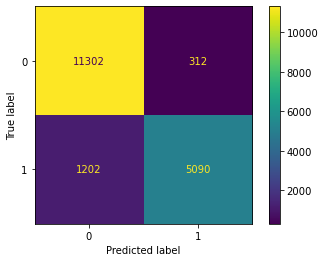

In [191]:
sink_model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('logreg', LogisticRegression(max_iter=5000, random_state=42))
])

sink_model.fit(x_train[used_num_cols], y_train)

displayMetrics(sink_model,x_train[used_num_cols],x_test[used_num_cols], y_train,y_test)

In [162]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53716 entries, 9619 to 15795
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Proxy              7346 non-null   object 
 1   RAhms              53716 non-null  object 
 2   DEdms              53716 non-null  object 
 3   Vmag               53716 non-null  float64
 4   r_Vmag             53716 non-null  object 
 5   RAdeg              53551 non-null  float64
 6   DEdeg              53551 non-null  float64
 7   AstroRef           9232 non-null   object 
 8   Plx                53551 non-null  float64
 9   pmRA               53551 non-null  float64
 10  pmDE               53551 non-null  float64
 11  e_RAdeg            53551 non-null  float64
 12  e_DEdeg            53551 non-null  float64
 13  e_Plx              53551 non-null  float64
 14  e_pmRA             53551 non-null  float64
 15  e_pmDE             53551 non-null  float64
 16  DE:RA              

In [163]:
# used_num_cols = []
# for col in numCols:
#     dt = Pipeline(steps=[
#         ('preprocessor',preprocessor),
#         ('model',DecisionTreeClassifier(random_state=42))
#     ])
#     dt.fit(x_train[[col]], y_train)
    
#     train_preds = dt.predict(x_train[[col]])
#     test_preds = dt.predict(x_test[[col]])
#     train_probs = dt.predict_proba(x_train[[col]])[:,1]
#     test_probs = dt.predict_proba(x_test[[col]])[:,1]
    
#     train_accuracy = accuracy_score(y_train, train_preds)
#     test_accuracy = accuracy_score(y_test, test_preds)
#     train_recall = recall_score(y_train, train_preds, zero_division=0)
#     test_recall = recall_score(y_test, test_preds, zero_division=0)
#     train_precision = precision_score(y_train, train_preds, zero_division=0)
#     test_precision = precision_score(y_test, test_preds, zero_division=0)
#     train_f1 = f1_score(y_train, train_preds, zero_division=0)
#     test_f1 = f1_score(y_test, test_preds, zero_division=0)
#     train_rocauc = roc_auc_score(y_train, train_probs)
#     test_rocauc = roc_auc_score(y_test, test_probs)
    
#     print(col)
#     if (train_accuracy > 0) and (test_accuracy > 0) and (train_recall > 0) and (test_recall > 0) and (train_precision > 0) and (test_precision > 0) and (train_f1 > 0) and (test_f1 > 0) and (train_rocauc > 0) and (test_rocauc > 0):
#         used_num_cols.append(col)
#         print(f'{col} added to used column list')
#     print(F'\nTrain Accuracy:\t\t{train_accuracy}')
#     print(F'Test Accuracy:\t\t{test_accuracy}')
#     print(F"\nTrain Recall:\t\t{train_recall}")
#     print(F'Test Recall:\t\t{test_recall}')
#     print(F"\nTrain Precision:\t{train_precision}")
#     print(F'Test Precision:\t\t{test_precision}')
#     print(F"\nTrain f1:\t\t{train_f1}")
#     print(F'Test f1:\t\t{test_f1}')
#     print(F"\nTrain ROC-AUC:\t\t{train_rocauc}")
#     print(F'Test ROC-AUC:\t\t{test_rocauc}')
#     print("\nTrain Matrix:\n")
#     print(confusion_matrix(y_train, train_preds))
#     print("\nTest Matrix:\n")
#     print(confusion_matrix(y_test, test_preds))
#     print('\n')
#     print("****"*20)
#     print('\n')

In [164]:
len(used_num_cols)

30

In [165]:
# sink_model = Pipeline(steps=[
#     ('preprocessor',preprocessor),
#     ('tree', DecisionTreeClassifier(random_state=42, max_depth = 8))
# ])

# sink_model.fit(x_train[used_num_cols], y_train)

# displayMetrics(sink_model, x_train[used_num_cols], x_test[used_num_cols], y_train, y_test)

In [166]:
# sink_model = Pipeline(steps=[
#     ('preprocessor',preprocessor),
#     ('tree', DecisionTreeClassifier(random_state=42))
# ])

# # sink_model.fit(x_train[used_num_cols], y_train)

# param_grid = {
#     'tree__criterion': ['gini','entropy'],
#     'tree__max_depth': [25,30],
#     'tree__min_samples_split': [35,36,37]
# }

# gridSearch = GridSearchCV(estimator=sink_model, param_grid=param_grid, verbose=1, cv=5, n_jobs=-1, scoring='recall')

# gridSearch.fit(x_train[used_num_cols], y_train)

# gridTree = gridSearch.best_estimator_

# display(gridSearch.best_params_)
# display(gridSearch.best_score_)

In [167]:
# gridTree.fit(x_train[used_num_cols], y_train)
# displayMetrics(gridTree, x_train[used_num_cols], x_test[used_num_cols], y_train, y_test)

String column exploration

In [168]:
x_train.shape

(53716, 70)

In [169]:
x_train[objCols].isna().sum() / len(x_train)

Proxy       0.863244
RAhms       0.000000
DEdms       0.000000
r_Vmag      0.000000
AstroRef    0.828133
m_BTmag     0.839619
r_B-V       0.012827
r_V-I       0.000000
CombMag     0.865050
m_Hpmag     0.834221
CCDM        0.780978
n_CCDM      0.780978
MultFlag    0.794549
Qual        0.764037
m_HIP       0.863169
Survey      0.548961
Chart       0.905838
Notes       0.949494
BD          0.355685
CoD         0.774723
CPD         0.684861
SpType      0.025393
r_SpType    0.025393
dtype: float64

In [170]:
objPreprocessor = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='Null')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [171]:
for col in objCols:
    print(f"{col}:")
    display(df[col].value_counts())
    print(len(df[col].value_counts()))
    print('\n')

Proxy:


H    9707
T     114
Name: Proxy, dtype: int64

2


RAhms:


14 27 45.32    3
08 44 23.00    2
12 35 49.30    2
11 28 02.08    2
17 17 20.56    2
              ..
14 10 28.76    1
20 25 04.02    1
06 53 47.36    1
06 17 35.13    1
19 22 43.49    1
Name: RAhms, Length: 71290, dtype: int64

71290


DEdms:


-14 56 12.1    3
+67 37 53.4    2
+41 19 24.2    2
+33 07 28.6    2
+50 59 44.7    2
              ..
+31 45 16.6    1
-47 37 53.0    1
-28 46 25.5    1
-59 14 42.3    1
-56 16 48.8    1
Name: DEdms, Length: 71135, dtype: int64

71135


r_Vmag:


H    56751
G    14467
T      404
Name: r_Vmag, dtype: int64

3


AstroRef:


A    8727
*    2198
B    1194
+     133
C      86
D      10
E       2
S       2
G       1
Name: AstroRef, dtype: int64

9


m_BTmag:


*    7089
A    3511
B     847
C      64
-      33
D       7
S       2
E       1
Name: m_BTmag, dtype: int64

8


r_B-V:


T    44888
G    25823
Name: r_B-V, dtype: int64

2


r_V-I:


L    43584
H    17540
O     2328
A     1700
I     1699
R      982
T      911
C      693
K      525
E      416
F      333
J      287
S      177
B      173
G      130
Q       73
M       21
D       21
N       16
P       13
Name: r_V-I, dtype: int64

20


CombMag:


*    9690
Name: CombMag, dtype: int64

1


m_Hpmag:


*    9498
A    1239
B     920
-     247
C      25
D       4
S       2
E       1
Name: m_Hpmag, dtype: int64

8


CCDM:


03075+7548    4
05353-0524    4
22363+4603    3
20378+4756    3
21390+5729    3
             ..
05484-1842    1
18365+0457    1
16563-2806    1
00132+1511    1
03016+2549    1
Name: CCDM, Length: 14227, dtype: int64

14227


n_CCDM:


I    13051
H     2303
M      382
Name: n_CCDM, dtype: int64

3


MultFlag:


C    11936
G     1486
X      885
V      284
O      133
Name: MultFlag, dtype: int64

5


Qual:


A    9065
S    5085
B    1331
D     904
C     636
Name: Qual, dtype: int64

5


m_HIP:


AB    9014
BA     318
AS     213
AC     149
BC      46
AD      35
CD      19
AP      18
AE      11
AG       3
CB       3
DE       3
PA       2
AF       2
BD       2
AK       1
EN       1
CR       1
DC       1
CA       1
GH       1
Name: m_HIP, dtype: int64

21


Survey:


S    32300
Name: Survey, dtype: int64

1


Chart:


G    6206
D     438
Name: Chart, dtype: int64

2


Notes:


P    2002
D     934
G     572
W      57
Y      47
X      27
Z       1
Name: Notes, dtype: int64

7


BD:


B+56 1790    2
B-07   47    1
B+05 1214    1
B+33 3044    1
B+35  429    1
            ..
B+83  121    1
B-02 2038    1
B+04 1365    1
B+41 2588    1
B+34 3368    1
Name: BD, Length: 46090, dtype: int64

46090


CoD:


C-51  2173    1
C-25  9212    1
C-43 10666    1
C-25 14403    1
C-26 12090    1
             ..
C-34 14536    1
C-24 17414    1
C-26 11171    1
C-41 15245    1
C-22  9141    1
Name: CoD, Length: 16208, dtype: int64

16208


CPD:


P-70  2126    1
P-72   608    1
P-52 11020    1
P-45  6028    1
P-33  6209    1
             ..
P-33  6078    1
P-55  3737    1
P-57  6530    1
P-41  9751    1
P-24  6878    1
Name: CPD, Length: 22613, dtype: int64

22613


SpType:


K0             5076
G5             3724
A0             3066
F8             2817
G0             2657
               ... 
G9IV + K1IV       1
A3II/IIIm..       1
A2/3IIIs:         1
F2Vp...           1
G5:+...           1
Name: SpType, Length: 3498, dtype: int64

3498


r_SpType:


S    35184
X     8494
3     6436
1     6403
4     6226
2     5279
G     1132
K      653
Name: r_SpType, dtype: int64

8




In [172]:
objCols

['Proxy',
 'RAhms',
 'DEdms',
 'r_Vmag',
 'AstroRef',
 'm_BTmag',
 'r_B-V',
 'r_V-I',
 'CombMag',
 'm_Hpmag',
 'CCDM',
 'n_CCDM',
 'MultFlag',
 'Qual',
 'm_HIP',
 'Survey',
 'Chart',
 'Notes',
 'BD',
 'CoD',
 'CPD',
 'SpType',
 'r_SpType']

In [173]:
len(df['m_HIP'].value_counts())

21

In [174]:
x_train.shape

(53716, 70)

In [175]:
for col in objCols:
    if len(df[col].value_counts()) <= 200:
        lg = Pipeline(steps=[
            ('preprocessor',objPreprocessor),
            ('logreg',LogisticRegression(max_iter=5000, random_state=42))
        ])
        lg.fit(x_train[[col]], y_train)

        train_preds = lg.predict(x_train[[col]])
        test_preds = lg.predict(x_test[[col]])
        train_probs = lg.predict_proba(x_train[[col]])[:,1]
        test_probs = lg.predict_proba(x_test[[col]])[:,1]

        train_accuracy = accuracy_score(y_train, train_preds)
        test_accuracy = accuracy_score(y_test, test_preds)
        train_recall = recall_score(y_train, train_preds, zero_division=0)
        test_recall = recall_score(y_test, test_preds, zero_division=0)
        train_precision = precision_score(y_train, train_preds, zero_division=0)
        test_precision = precision_score(y_test, test_preds, zero_division=0)
        train_f1 = f1_score(y_train, train_preds, zero_division=0)
        test_f1 = f1_score(y_test, test_preds, zero_division=0)
        train_rocauc = roc_auc_score(y_train, train_probs)
        test_rocauc = roc_auc_score(y_test, test_probs)

        print(col)
#         if (train_accuracy > 0) and (test_accuracy > 0) and (train_recall > 0) and (test_recall > 0) and (train_precision > 0) and (test_precision > 0) and (train_f1 > 0) and (test_f1 > 0) and (train_rocauc > 0) and (test_rocauc > 0):
#             used_num_cols.append(col)
#             print(f'{col} added to used column list')
        print(F'\nTrain Accuracy:\t\t{train_accuracy}')
        print(F'Test Accuracy:\t\t{test_accuracy}')
        print(F"\nTrain Recall:\t\t{train_recall}")
        print(F'Test Recall:\t\t{test_recall}')
        print(F"\nTrain Precision:\t{train_precision}")
        print(F'Test Precision:\t\t{test_precision}')
        print(F"\nTrain f1:\t\t{train_f1}")
        print(F'Test f1:\t\t{test_f1}')
        print(F"\nTrain ROC-AUC:\t\t{train_rocauc}")
        print(F'Test ROC-AUC:\t\t{test_rocauc}')
        print("\nTrain Matrix:\n")
        print(confusion_matrix(y_train, train_preds))
        print("\nTest Matrix:\n")
        print(confusion_matrix(y_test, test_preds))
        print('\n')
        print("****"*20)
        print('\n')

Proxy

Train Accuracy:		0.7645766624469432
Test Accuracy:		0.7632637104881046

Train Recall:		0.35887740973479604
Test Recall:		0.35982199618563254

Train Precision:	0.9173699972774298
Test Precision:		0.9147474747474748

Train f1:		0.5159240545092635
Test f1:		0.5164822630318239

Train ROC-AUC:		0.6707585438035446
Test ROC-AUC:		0.6708322449581041

Train Matrix:

[[34331   607]
 [12039  6739]]

Test Matrix:

[[11403   211]
 [ 4028  2264]]


********************************************************************************


r_Vmag

Train Accuracy:		0.6558381115496313
Test Accuracy:		0.65458505528873

Train Recall:		0.015603365640643307
Test Recall:		0.017164653528289893

Train Precision:	0.9932203389830508
Test Precision:		0.9908256880733946

Train f1:		0.0307240601897971
Test f1:		0.03374472738634588

Train ROC-AUC:		0.5204276335321775
Test ROC-AUC:		0.5203520648457793

Train Matrix:

[[34936     2]
 [18485   293]]

Test Matrix:

[[11613     1]
 [ 6184   108]]


***********************

In [176]:
usedCols = []
for col in objCols:
    if len(x_train[col].value_counts()) <= 20:
        usedCols.append(col)

In [177]:
len(usedCols)

16


Train Accuracy:		0.86627820388711
Test Accuracy:		0.8679772143415615

Train Recall:		0.6748322505059112
Test Recall:		0.6843610934520026

Train Precision:	0.9216670303294785
Test Precision:		0.9192997438087105

Train f1:		0.7791680757524518
Test f1:		0.7846209912536444

Train ROC-AUC:		0.8707373556837511
Test ROC-AUC:		0.8763538845033358


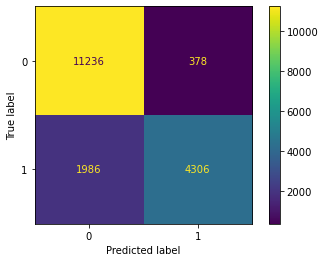

In [178]:
objSinkModel = Pipeline(steps=[
    ('preprocessor',objPreprocessor),
    ('logreg', LogisticRegression(max_iter=5000, random_state=42))
])

objSinkModel.fit(x_train[usedCols], y_train)

displayMetrics(objSinkModel, x_train[usedCols],x_test[usedCols], y_train, y_test)

In [179]:
for col in objCols:
    display(x_train[[col]].head())
    display(x_train[[col]].value_counts())
    display(x_train[[col]].isna().sum() / len(x_train))

,Proxy
9619,NaN
2767,NaN
43288,NaN
57634,H
61419,NaN


Proxy
H        7259
T          87
dtype: int64

Proxy    0.863244
dtype: float64

,RAhms
9619,03 27 34.90
2767,01 00 32.75
43288,14 36 10.51
57634,19 22 57.42
61419,20 33 00.68


RAhms      
14 27 45.32    3
17 26 49.13    2
10 33 04.63    2
18 55 30.36    2
04 04 30.79    2
              ..
16 04 08.26    1
16 04 08.02    1
16 04 07.14    1
16 04 02.42    1
00 00 00.91    1
Length: 53548, dtype: int64

RAhms    0.0
dtype: float64

,DEdms
9619,-39 52 50.0
2767,+58 21 50.9
43288,-03 46 51.7
57634,-01 44 26.0
61419,+01 28 04.4


DEdms      
+57 26 06.5    2
-48 41 48.8    2
+47 53 06.4    2
-24 36 35.3    2
-01 22 32.6    2
              ..
-22 22 48.2    1
-22 22 34.0    1
-22 22 25.5    1
-22 22 17.3    1
+00 00 08.8    1
Length: 53455, dtype: int64

DEdms    0.0
dtype: float64

,r_Vmag
9619,H
2767,H
43288,H
57634,H
61419,H


r_Vmag
H         42560
G         10861
T           295
dtype: int64

r_Vmag    0.0
dtype: float64

,AstroRef
9619,NaN
2767,NaN
43288,NaN
57634,*
61419,NaN


AstroRef
A           6481
*           1681
B            897
+            100
C             62
D              8
S              1
G              1
E              1
dtype: int64

AstroRef    0.828133
dtype: float64

,m_BTmag
9619,NaN
2767,NaN
43288,NaN
57634,*
61419,NaN


m_BTmag
*          5295
A          2607
B           630
C            49
-            26
D             6
S             1
E             1
dtype: int64

m_BTmag    0.839619
dtype: float64

,r_B-V
9619,T
2767,T
43288,T
57634,G
61419,T


r_B-V
T        33612
G        19415
dtype: int64

r_B-V    0.012827
dtype: float64

,r_V-I
9619,L
2767,L
43288,L
57634,S
61419,K


r_V-I
L        32686
H        13153
O         1731
I         1299
A         1268
R          742
T          689
C          516
K          378
E          317
F          251
J          222
S          132
B          125
G           96
Q           55
M           17
D           16
P           12
N           11
dtype: int64

r_V-I    0.0
dtype: float64

,CombMag
9619,NaN
2767,NaN
43288,NaN
57634,*
61419,NaN


CombMag
*          7249
dtype: int64

CombMag    0.86505
dtype: float64

,m_Hpmag
9619,NaN
2767,NaN
43288,NaN
57634,*
61419,NaN


m_Hpmag
*          7096
A           906
B           691
-           189
C            18
D             3
S             1
E             1
dtype: int64

m_Hpmag    0.834221
dtype: float64

,CCDM
9619,NaN
2767,NaN
43288,NaN
57634,19230-0144
61419,NaN


CCDM      
03075+7548    4
21390+5729    3
20586+1626    3
12525+0712    3
16457+3000    3
             ..
16026-1230    1
16020-1118    1
16019-6424    1
16019-2822    1
00000+3852    1
Length: 10952, dtype: int64

CCDM    0.780978
dtype: float64

,n_CCDM
9619,NaN
2767,NaN
43288,NaN
57634,H
61419,NaN


n_CCDM
I         9758
H         1716
M          291
dtype: int64

n_CCDM    0.780978
dtype: float64

,MultFlag
9619,NaN
2767,NaN
43288,NaN
57634,C
61419,NaN


MultFlag
C           8905
G           1111
X            693
V            227
O            100
dtype: int64

MultFlag    0.794549
dtype: float64

,Qual
9619,NaN
2767,NaN
43288,NaN
57634,A
61419,NaN


Qual
A       6781
S       3770
B        977
D        671
C        476
dtype: int64

Qual    0.764037
dtype: float64

,m_HIP
9619,NaN
2767,NaN
43288,NaN
57634,AB
61419,NaN


m_HIP
AB       6726
BA        241
AS        157
AC        124
BC         33
AD         23
AP         12
CD         12
AE          8
AG          3
DE          2
CB          2
DC          1
AK          1
GH          1
AF          1
BD          1
CA          1
PA          1
dtype: int64

m_HIP    0.863169
dtype: float64

,Survey
9619,S
2767,S
43288,NaN
57634,NaN
61419,NaN


Survey
S         24228
dtype: int64

Survey    0.548961
dtype: float64

,Chart
9619,NaN
2767,NaN
43288,NaN
57634,G
61419,G


Chart
G        4720
D         338
dtype: int64

Chart    0.905838
dtype: float64

,Notes
9619,NaN
2767,NaN
43288,NaN
57634,NaN
61419,NaN


Notes
P        1486
D         696
G         435
W          47
Y          31
X          17
Z           1
dtype: int64

Notes    0.949494
dtype: float64

,BD
9619,NaN
2767,B+57 179
43288,B-03 3645
57634,B-01 3726
61419,NaN


BD       
B-23  442    1
B+28   75    1
B+27 4600    1
B+27 4619    1
B+27 4642    1
            ..
B+62 1012    1
B+62 1013    1
B+62 1021    1
B+62 1028    1
B+00    8    1
Length: 34610, dtype: int64

BD    0.355685
dtype: float64

,CoD
9619,C-40 929
2767,NaN
43288,NaN
57634,NaN
61419,NaN


CoD       
C-89    10    1
C-32 12409    1
C-32 13037    1
C-32 12924    1
C-32 12824    1
             ..
C-42 13933    1
C-42 13922    1
C-42 13849    1
C-42 13839    1
C-22     1    1
Length: 12101, dtype: int64

CoD    0.774723
dtype: float64

,CPD
9619,P-40 318
2767,NaN
43288,NaN
57634,NaN
61419,NaN


CPD       
P-89    53    1
P-37  9300    1
P-37  9394    1
P-37  9384    1
P-37  9383    1
             ..
P-53  1044    1
P-53  1022    1
P-53  1017    1
P-53   984    1
P-19  1369    1
Length: 16928, dtype: int64

CPD    0.684861
dtype: float64

,SpType
9619,K4III
2767,A3
43288,G8III
57634,K5
61419,M0


SpType     
K0             3832
G5             2780
A0             2301
F8             2099
G0             2017
               ... 
G2III:            1
G2IIIb            1
G2IIIevar         1
G2IIIv comp       1
(G3w)F7           1
Length: 2969, dtype: int64

SpType    0.025393
dtype: float64

,r_SpType
9619,2
2767,S
43288,X
57634,G
61419,S


r_SpType
S           26357
X            6411
1            4804
3            4799
4            4696
2            3932
G             857
K             496
dtype: int64

r_SpType    0.025393
dtype: float64

In [180]:
df['AstroRef'].isna().sum()

59269

In [181]:
x_train['AstroRefIndicator']

9619     1
2767     1
43288    1
57634    0
61419    1
        ..
37194    1
6265     1
54886    1
860      1
15795    0
Name: AstroRefIndicator, Length: 53716, dtype: int64

In [182]:
x_test.columns

Index(['Proxy', 'RAhms', 'DEdms', 'Vmag', 'r_Vmag', 'RAdeg', 'DEdeg',
       'AstroRef', 'Plx', 'pmRA', 'pmDE', 'e_RAdeg', 'e_DEdeg', 'e_Plx',
       'e_pmRA', 'e_pmDE', 'DE:RA', 'Plx:RA', 'Plx:DE', 'pmRA:RA', 'pmRA:DE',
       'pmRA:Plx', 'pmDE:RA', 'pmDE:DE', 'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2',
       'BTmag', 'e_BTmag', 'VTmag', 'e_VTmag', 'm_BTmag', 'B-V', 'e_B-V',
       'r_B-V', 'V-I', 'e_V-I', 'r_V-I', 'CombMag', 'Hpmag', 'e_Hpmag',
       'Hpscat', 'o_Hpmag', 'm_Hpmag', 'Hpmax', 'HPmin', 'CCDM', 'n_CCDM',
       'Nsys', 'Ncomp', 'MultFlag', 'Qual', 'm_HIP', 'theta', 'rho', 'e_rho',
       'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD', 'CPD',
       '(V-I)red', 'SpType', 'r_SpType', 'AstroRefIndicator'],
      dtype='object')

In [183]:
x_test['AstroRefIndicator'].isna().sum()

0


Train Accuracy:		0.7954799314915482
Test Accuracy:		0.7953200044677762

Train Recall:		0.45329641069336457
Test Recall:		0.45677050222504767

Train Precision:	0.9220103986135182
Test Precision:		0.9208586991348927

Train f1:		0.6077829346661906
Test f1:		0.6106448528630617

Train ROC-AUC:		0.7163442383193768
Test ROC-AUC:		0.7177515331858836


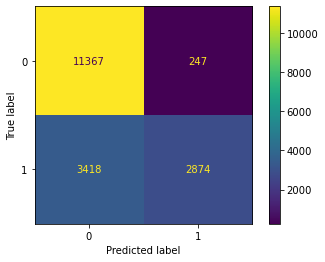

In [184]:
lg = Pipeline(steps=[
    ('lg', LogisticRegression(max_iter=5000, random_state=42))
])

lg.fit(x_train[['AstroRefIndicator']], y_train)


displayMetrics(lg, x_train[['AstroRefIndicator']], x_test[['AstroRefIndicator']], y_train, y_test)

Naive Bayes

In [193]:
used_num_cols = []
for col in numCols:
    lg = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('model', GaussianNB())
    ])
    lg.fit(x_train[[col]], y_train)
    
    train_preds = lg.predict(x_train[[col]])
    test_preds = lg.predict(x_test[[col]])
    train_probs = lg.predict_proba(x_train[[col]])[:,1]
    test_probs = lg.predict_proba(x_test[[col]])[:,1]
    
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds, zero_division=0)
    test_recall = recall_score(y_test, test_preds, zero_division=0)
    train_precision = precision_score(y_train, train_preds, zero_division=0)
    test_precision = precision_score(y_test, test_preds, zero_division=0)
    train_f1 = f1_score(y_train, train_preds, zero_division=0)
    test_f1 = f1_score(y_test, test_preds, zero_division=0)
    train_rocauc = roc_auc_score(y_train, train_probs)
    test_rocauc = roc_auc_score(y_test, test_probs)
    
    print(col)
    if (train_accuracy > 0) and (test_accuracy > 0) and (train_recall > 0) and (test_recall > 0) and (train_precision > 0) and (test_precision > 0) and (train_f1 > 0) and (test_f1 > 0) and (train_rocauc > 0) and (test_rocauc > 0):
        used_num_cols.append(col)
        print(f'{col} added to used column list')
    print(F'\nTrain Accuracy:\t\t{train_accuracy}')
    print(F'Test Accuracy:\t\t{test_accuracy}')
    print(F"\nTrain Recall:\t\t{train_recall}")
    print(F'Test Recall:\t\t{test_recall}')
    print(F"\nTrain Precision:\t{train_precision}")
    print(F'Test Precision:\t\t{test_precision}')
    print(F"\nTrain f1:\t\t{train_f1}")
    print(F'Test f1:\t\t{test_f1}')
    print(F"\nTrain ROC-AUC:\t\t{train_rocauc}")
    print(F'Test ROC-AUC:\t\t{test_rocauc}')
    print("\nTrain Matrix:\n")
    print(confusion_matrix(y_train, train_preds))
    print("\nTest Matrix:\n")
    print(confusion_matrix(y_test, test_preds))
    print('\n')
    print("****"*20)
    print('\n')

Vmag
Vmag added to used column list

Train Accuracy:		0.6621304639213642
Test Accuracy:		0.6591645258572546

Train Recall:		0.1300990520822239
Test Recall:		0.1250794659885569

Train Precision:	0.5738783180643646
Test Precision:		0.5682310469314079

Train f1:		0.21211200347297593
Test f1:		0.20502800573140553

Train ROC-AUC:		0.5788115092071775
Test ROC-AUC:		0.5730799993562803

Train Matrix:

[[33124  1814]
 [16335  2443]]

Test Matrix:

[[11016   598]
 [ 5505   787]]


********************************************************************************


RAdeg

Train Accuracy:		0.6504207312532578
Test Accuracy:		0.6486094046688261

Train Recall:		0.0
Test Recall:		0.0

Train Precision:	0.0
Test Precision:		0.0

Train f1:		0.0
Test f1:		0.0

Train ROC-AUC:		0.5142531496278473
Test ROC-AUC:		0.5126643291505057

Train Matrix:

[[34938     0]
 [18778     0]]

Test Matrix:

[[11614     0]
 [ 6292     0]]


********************************************************************************


DEde

pmRA:Plx

Train Accuracy:		0.6504207312532578
Test Accuracy:		0.6486094046688261

Train Recall:		0.0
Test Recall:		0.0

Train Precision:	0.0
Test Precision:		0.0

Train f1:		0.0
Test f1:		0.0

Train ROC-AUC:		0.5209964758959744
Test ROC-AUC:		0.5247976785257419

Train Matrix:

[[34938     0]
 [18778     0]]

Test Matrix:

[[11614     0]
 [ 6292     0]]


********************************************************************************


pmDE:RA

Train Accuracy:		0.6504207312532578
Test Accuracy:		0.6486094046688261

Train Recall:		0.0
Test Recall:		0.0

Train Precision:	0.0
Test Precision:		0.0

Train f1:		0.0
Test f1:		0.0

Train ROC-AUC:		0.5188697104456742
Test ROC-AUC:		0.5237210765423189

Train Matrix:

[[34938     0]
 [18778     0]]

Test Matrix:

[[11614     0]
 [ 6292     0]]


********************************************************************************


pmDE:DE

Train Accuracy:		0.6504207312532578
Test Accuracy:		0.6486094046688261

Train Recall:		0.0
Test Recall:		0.0

Tr

e_Hpmag
e_Hpmag added to used column list

Train Accuracy:		0.7358515153771689
Test Accuracy:		0.735340109460516

Train Recall:		0.27425710938332093
Test Recall:		0.27844882390336934

Train Precision:	0.9017685168972159
Test Precision:		0.8980010251153254

Train f1:		0.4205970027359223
Test f1:		0.42508795341501876

Train ROC-AUC:		0.6753561118607614
Test ROC-AUC:		0.6777301992980171

Train Matrix:

[[34377   561]
 [13628  5150]]

Test Matrix:

[[11415   199]
 [ 4540  1752]]


********************************************************************************


Hpscat
Hpscat added to used column list

Train Accuracy:		0.7277719860004468
Test Accuracy:		0.7275215011727912

Train Recall:		0.2611566727020982
Test Recall:		0.26509853782581055

Train Precision:	0.8675039801875111
Test Precision:		0.8673946957878315

Train f1:		0.40145716507715606
Test f1:		0.4060864272671942

Train ROC-AUC:		0.6596781546125612
Test ROC-AUC:		0.6547195475986356

Train Matrix:

[[34189   749]
 [13874  4904]]

Te


Train Accuracy:		0.8368083997319234
Test Accuracy:		0.8389366692728695

Train Recall:		0.6184897220151241
Test Recall:		0.6244437380801017

Train Precision:	0.8787832929782082
Test Precision:		0.8829213483146068

Train f1:		0.7260111270863286
Test f1:		0.7315211320052132

Train ROC-AUC:		0.8754665264014599
Test ROC-AUC:		0.8782009453045194


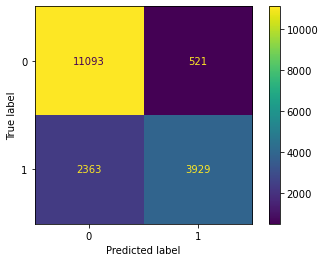

In [194]:
sink_model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('logreg', GaussianNB())
])

sink_model.fit(x_train[used_num_cols], y_train)

displayMetrics(sink_model,x_train[used_num_cols],x_test[used_num_cols], y_train,y_test)

Final Model:

In [ ]:
used_columns = []

finalModel = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ()
])